# _Back propagation_
(target-mlp)=
We zagen dat het perceptron-model (en bijgevolg ook het logistische regressiemodel) fundamentele problemen heeft om niet-lineair scheidbare problemen op te lossen. Een specifieke remedie is om meerdere perceptrons samen te voegen. Dit brengt ons bij neurale netwerken. In het geval van zogenaamde _**multi layer perceptrons**_ worden inputs aan meerdere perceptrons gekoppeld en worden ook één of meerdere lagen van perceptrons voorzien tussen in- en outputs: zogenaamde **_hidden layers_**.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, FancyArrowPatch

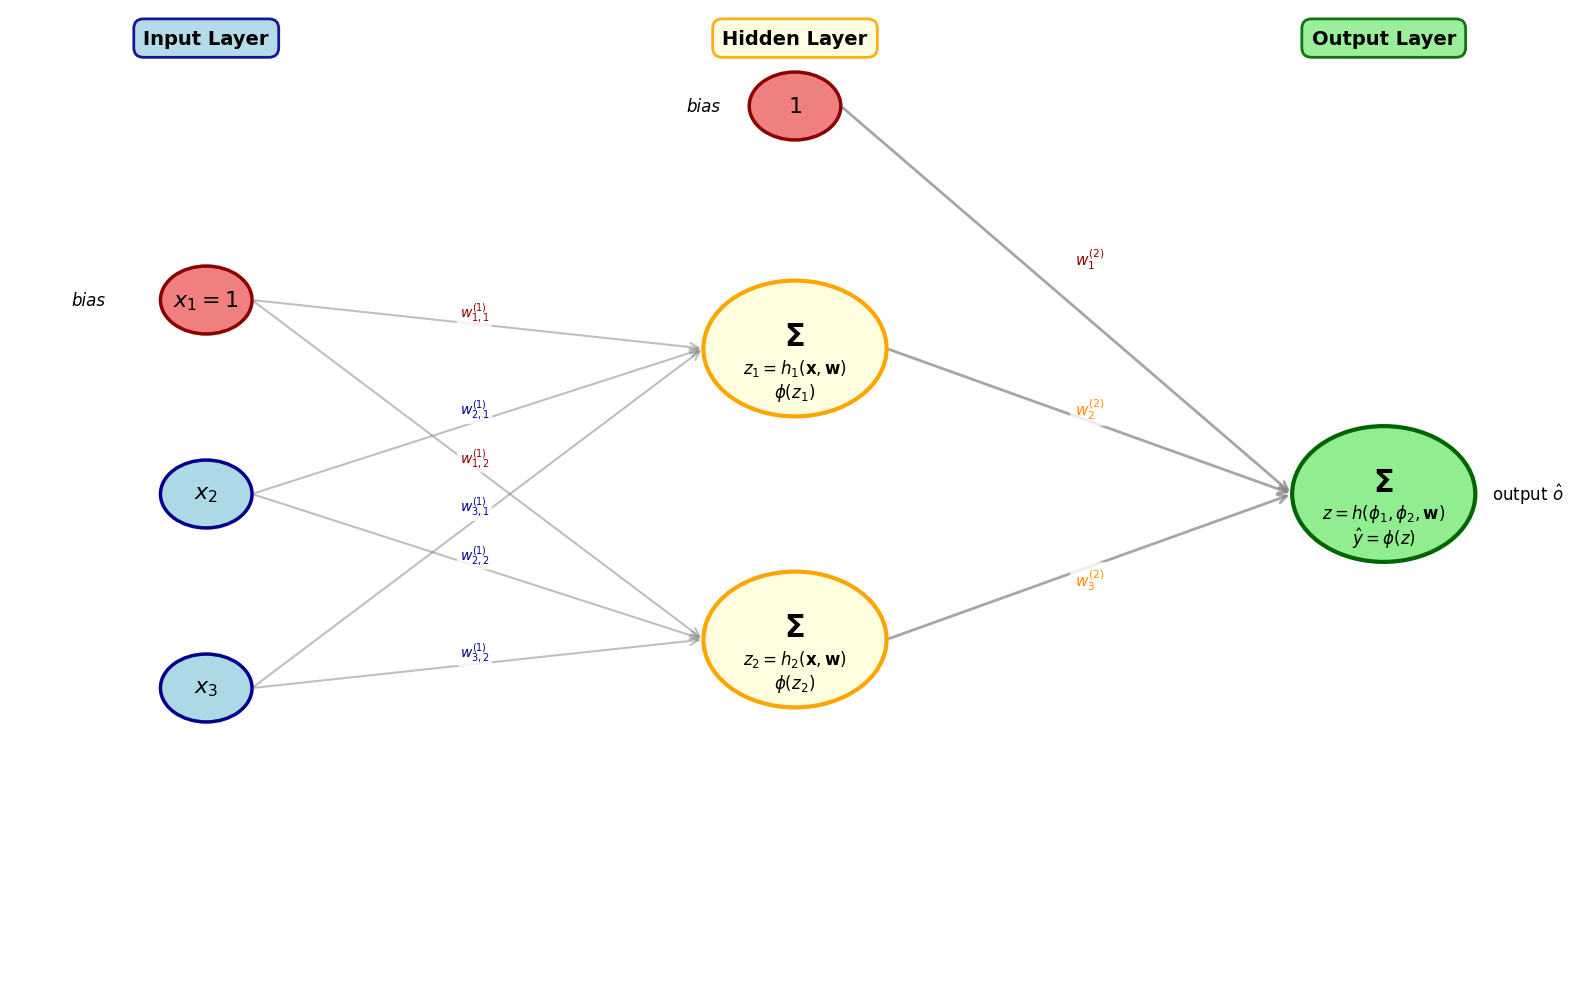

In [7]:
# Visualize a simple multi-layer perceptron with 2 hidden neurons
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis("off")

# Define positions
input_y_positions = [7, 5, 3]  # bias, x1, x2
input_x = 1.5
hidden_x = 6
hidden_y_positions = [6.5, 3.5]  # Two hidden neurons
hidden_bias_y = 9  # Bias for hidden layer
output_x = 10.5
output_y = 5  # Center output between hidden neurons

# Color scheme
input_color = "lightblue"
input_edge = "darkblue"
bias_color = "lightcoral"
bias_edge = "darkred"
hidden_color = "lightyellow"
hidden_edge = "orange"
output_color = "lightgreen"
output_edge = "darkgreen"

# Draw input nodes
input_nodes = []
for i, y_pos in enumerate(input_y_positions):
    if i == 0:
        # Bias node
        circle = Circle(
            (input_x, y_pos), 0.35, color=bias_color, ec=bias_edge, linewidth=2.5, zorder=3
        )
        ax.text(
            input_x,
            y_pos,
            "$x_1=1$",
            ha="center",
            va="center",
            fontsize=16,
            fontweight="bold",
            zorder=4,
        )
        ax.text(input_x - 0.9, y_pos, "bias", ha="center", va="center", fontsize=12, style="italic")
    else:
        # Regular input nodes
        circle = Circle(
            (input_x, y_pos), 0.35, color=input_color, ec=input_edge, linewidth=2.5, zorder=3
        )
        ax.text(
            input_x,
            y_pos,
            f"$x_{i + 1}$",
            ha="center",
            va="center",
            fontsize=16,
            fontweight="bold",
            zorder=4,
        )

    ax.add_patch(circle)
    input_nodes.append((input_x, y_pos))

# Draw hidden layer neurons (2 neurons)
hidden_neurons = []
for j, h_y in enumerate(hidden_y_positions):
    hidden_neuron = Circle(
        (hidden_x, h_y), 0.7, color=hidden_color, ec=hidden_edge, linewidth=3, zorder=3
    )
    ax.add_patch(hidden_neuron)
    hidden_neurons.append((hidden_x, h_y))

    # Add sigma symbol and activation function
    ax.text(
        hidden_x,
        h_y + 0.12,
        "Σ",
        ha="center",
        va="center",
        fontsize=22,
        fontweight="bold",
        zorder=4,
    )
    ax.text(
        hidden_x,
        h_y - 0.2,
        f"$z_{{{j + 1}}} = h_{{{j + 1}}}" + r"(\mathbf{x},\mathbf{w})" + "$",
        ha="center",
        va="center",
        fontsize=12,
        style="italic",
        zorder=4,
    )
    ax.text(
        hidden_x,
        h_y - 0.45,
        f"$\phi(z_{{{j + 1}}})$",
        ha="center",
        va="center",
        fontsize=12,
        style="italic",
        zorder=4,
    )

# Draw bias node for hidden layer (connects to output)
bias_hidden = Circle(
    (hidden_x, hidden_bias_y), 0.35, color=bias_color, ec=bias_edge, linewidth=2.5, zorder=3
)
ax.add_patch(bias_hidden)
ax.text(
    hidden_x,
    hidden_bias_y,
    "$1$",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold",
    zorder=4,
)
ax.text(
    hidden_x - 0.7, hidden_bias_y, "bias", ha="center", va="center", fontsize=12, style="italic"
)

# Draw output node
output_neuron = Circle(
    (output_x, output_y), 0.7, color=output_color, ec=output_edge, linewidth=3, zorder=3
)
ax.add_patch(output_neuron)
ax.text(
    output_x,
    output_y + 0.12,
    "Σ",
    ha="center",
    va="center",
    fontsize=22,
    fontweight="bold",
    zorder=4,
)
ax.text(
    output_x,
    output_y - 0.2,
    "$z = h(\phi_1, \phi_2,\mathbf{w})$",
    ha="center",
    va="center",
    fontsize=12,
    style="italic",
    zorder=4,
)
ax.text(
    output_x,
    output_y - 0.45,
    "$\hat{y} = \phi(z)$",
    ha="center",
    va="center",
    fontsize=12,
    style="italic",
    zorder=4,
)
ax.text(output_x + 1.1, output_y, "output " + r"$\hat{o}$", ha="center", va="center", fontsize=12)

# Draw connections from inputs to BOTH hidden neurons
for j, (h_x, h_y) in enumerate(hidden_neurons):
    for i, (x, y) in enumerate(input_nodes):
        arrow = FancyArrowPatch(
            (x + 0.35, y),
            (h_x - 0.7, h_y),
            arrowstyle="->",
            mutation_scale=15,
            linewidth=1.5,
            color="gray",
            alpha=0.5,
            zorder=1,
        )
        ax.add_patch(arrow)

        # Add weight labels
        mid_x = (x + h_x) / 2 - 0.2
        mid_y = (y + h_y) / 2
        weight_label = f"$w^{{(1)}}_{{{i + 1},{j + 1}}}$"
        ax.text(
            mid_x,
            mid_y,
            weight_label,
            ha="center",
            va="bottom",
            fontsize=10,
            color=bias_edge if i == 0 else input_edge,
            fontweight="bold",
            bbox={
                "boxstyle": "round,pad=0.2",
                "facecolor": "white",
                "edgecolor": "none",
                "alpha": 0.8,
            },
        )

# Draw connections from hidden neurons to output
for j, (h_x, h_y) in enumerate(hidden_neurons):
    arrow = FancyArrowPatch(
        (h_x + 0.7, h_y),
        (output_x - 0.7, output_y),
        arrowstyle="->",
        mutation_scale=15,
        linewidth=2,
        color="gray",
        alpha=0.7,
        zorder=2,
    )
    ax.add_patch(arrow)

    # Add weight labels
    mid_x = (h_x + output_x) / 2
    mid_y = (h_y + output_y) / 2
    ax.text(
        mid_x,
        mid_y,
        f"$w^{{(2)}}_{{{j + 2}}}$",
        ha="center",
        va="bottom" if j == 0 else "top",
        fontsize=11,
        color="darkorange",
        fontweight="bold",
        bbox={"boxstyle": "round,pad=0.3", "facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    )

# Draw connection from bias to output
arrow = FancyArrowPatch(
    (hidden_x + 0.35, hidden_bias_y),
    (output_x - 0.7, output_y),
    arrowstyle="->",
    mutation_scale=15,
    linewidth=2,
    color="gray",
    alpha=0.7,
    zorder=2,
)
ax.add_patch(arrow)

# Add weight label for bias to output
mid_x = (hidden_x + output_x) / 2
mid_y = (hidden_bias_y + output_y) / 2 + 0.3
ax.text(
    mid_x,
    mid_y,
    "$w^{{(2)}}_{{1}}$",
    ha="center",
    va="bottom",
    fontsize=11,
    color=bias_edge,
    fontweight="bold",
    bbox={"boxstyle": "round,pad=0.3", "facecolor": "white", "edgecolor": "none", "alpha": 0.8},
)

# Add layer labels - all at y = 9.7 for alignment
layer_label_y = 9.7
ax.text(
    input_x,
    layer_label_y,
    "Input Layer",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightblue",
        "edgecolor": "darkblue",
        "linewidth": 2,
        "alpha": 0.9,
    },
)
ax.text(
    hidden_x,
    layer_label_y,
    "Hidden Layer",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightyellow",
        "edgecolor": "orange",
        "linewidth": 2,
        "alpha": 0.9,
    },
)
ax.text(
    output_x,
    layer_label_y,
    "Output Layer",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightgreen",
        "edgecolor": "darkgreen",
        "linewidth": 2,
        "alpha": 0.9,
    },
)

plt.tight_layout()
plt.show()


## _Forward pass_
Iedere input wordt volgens de aanwezige connecties (architectuur) voorwaarts _gepropageerd_ door het netwerk richting de output (van links naar rechts in bovenstaande illustratie).  
  
In bovenstaande illustratie gaat dit als volgt:

$$
\begin{align}
z_{1,i} &= w_{1,1} +  w_{2,1}x_{i,2} + w_{3,1}x_{i,3} \cr
z_{2,i} &= w_{1,2} +  w_{2,2}x_{i,2} + w_{3,2}x_{i,3} \cr
z_i &= w_1 + w_2\phi(z_{1,i}) +  w_3\phi(z_{2,i}) \cr
\hat{y_i} &= \phi(z_i)
\end{align}
$$

## _Backward pass_
### Stap 1
Eens de _forward pass_ is uitgevoerd, kunnen we de predictiefout aan de hand van de gekozen _loss_ functie uitdrukken. Voor deze uiteenzetting kiezen we voor de _squared error_ $\mathcal{L}_{SE} = \frac{1}{2}(y-\hat{y})^2$. Merk op dat:
- we het subscript $i$ achterwege laten
- we geen _sum of squared errors_ gebruiken (zoals eerder bij het lineaire regressiemodel) omdat het hier maar over één input gaat.
- we de term $\frac{1}{2}$ toevoegen omdat we hiermee de exponent wegwerken bij het berekenen van de gradiënt.  
   
We werken ook met de veronderstelling van een logistische activatiefunctie.

:::{important}
De principes gelden voor eender welke architectuur en afleidbare _loss_ functie.
:::
  
We willen opnieuw via _gradient descent_, stap voor stap de gewichten updaten aan de hand van de partiële afgeleiden (gradiënt) van de _loss_ functie. De individuele partiële afgeleiden geven ons telkens de richting aan waarin we een bepaald gewicht (of parameter) moeten verschuiven om de grootste daling in de _loss_ te bekomen - rekening houdend met een bepaalde stapgrootte (_learning rate_) en bij het constant houden van alle andere gewichten (of parameters).  
  
Het berekenen van de gradiënt gebeurt, gezien de (variabele) netwerkstructuur, op een speciale manier waarbij er **sequentieel gewerkt wordt, beginnend bij de output en eindigend bij de input** (van rechts naar links in bovenstaande illustratie). Deze beweging wordt de **_backward pass_** genoemd.  
  
Doordat de output van het netwerk tot stand komt op basis van een reeks _geneste_ functies, speelt de _{ref}`kettingregel <target-chain-rule>`_ hierin een centrale rol. 
  
### Stap 2
Nadat we in de eerste stap de _loss_ bepaald hebben, beginnen we rechts, bij de eerste gewichten die we tegenkomen vóór de output: ${w_1}$, ${w_2}$ en ${w_3}$ in bovenstaande illustratie.  
  
Als we de $SE$ _loss_ in termen van die gewichten uitdrukken krijgen we:

$$
\begin{align}
\mathcal{L}_{SE} &= \frac{1}{2}(y - \hat{y})^2 \cr
&= \frac{1}{2}(y - \phi(z))^2 \cr
&= \frac{1}{2}(y - \phi(w_1 + w_2\phi(z_1) +  w_3\phi(z_2)))^2 \cr
\end{align}
$$


We kunnen dit zien als _vier_ geneste functies:

$$
\mathcal{L}_{SE} = f(g(\phi(h(\pmb{w}))))
$$

met (in de veronderstelling van een logistische activatiefunctie)

$$
\begin{align}
f &= \frac{1}{2}g(\phi(h(\pmb{w})))^2 \cr
g &= y - \phi(h(\pmb{w})) \cr
\phi &= \frac{1}{1 + e^{-h(\pmb{w})}} \cr
h &= w_1 + w_2\phi(z_1) +  w_3\phi(z_2)
\end{align}
$$

Voor de partiële afgeleide van de _loss_ functie met betrekking tot het _bias_ gewicht $w_1$ krijgen we via de _{ref}`kettingregel <target-chain-rule>`_:

$$
\frac{\partial \mathcal{L}_{SE}}{\partial w_1} = \frac{\partial}{\partial w_1}f(g(\phi(h(w_1)))) = \frac{\partial \mathcal{L}_{SE}}{\partial f}\frac{\partial g}{\partial \phi}\frac{\partial \phi}{\partial h}\frac{\partial h}{\partial w_1}
$$

waarbij

$$
\begin{align}
\frac{\partial \mathcal{L}_{SE}}{\partial f} &= \frac{1}{2}2(y - \hat{y}) = (y - \hat{y}) \cr
\frac{\partial g}{\partial \phi} &= -1 \cr
\frac{\partial \phi}{\partial h} &= \phi(z)(1 - \phi(z))\cr
\frac{\partial h}{\partial w_1} &= 1
\end{align}
$$

We krijgen dus:

$$
\frac{\partial \mathcal{L}_{SE}}{\partial w_1} = (y - \hat{y})(-1)\phi(z)(1 - \phi(z))
$$

Voor de partiële afgeleide van de _loss_ functie met betrekking tot gewicht $w_2$ zit het enige verschil in de laatste term van de ketting:

$$
\begin{align}
\frac{\partial h}{\partial w_2} &= \phi(z_1) \cr
\frac{\partial \mathcal{L}_{SE}}{\partial w_2} &= (y - \hat{y})(-1)\phi(z)(1 - \phi(z))\phi(z_1)
\end{align}
$$

Hiermee kunnen we exact zoals voorheen een update berekenen binnen een _gradient descent_ iteratie:

$$
\pmb{w}^{k+1} = \pmb{w}^k - \lambda \nabla \mathcal{L}(\pmb{w}^k) 
$$

### Stap 3
Als we nu naar de gewichten op het voorgaande niveau gaan kijken, kunnen we de ketting van partiële afgeleiden simpelweg verlengen. Laten we kijken naar gewicht $w_{2,1}$ dat verbonden is met input $x_2$ en het eerste hidden neuron.

We moeten de _loss_ nu uitdrukken als een functie van $w_{2,1}$:

$$
\begin{align}
\mathcal{L}_{SE} &= \frac{1}{2}(y - \hat{y})^2 \cr
&= \frac{1}{2}(y - \phi(z))^2 \cr
&= \frac{1}{2}(y - \phi(w_1 + w_2\phi(z_1) + w_3\phi(z_2)))^2 \cr
&= \frac{1}{2}(y - \phi(w_1 + w_2\phi(w_{1,1} + w_{2,1}x_2 + w_{3,1}x_3) + w_3\phi(z_2)))^2
\end{align}
$$

We hebben nu _zes_ geneste functies:

$$
\mathcal{L}_{SE} = f(g(\phi(h(\phi(h_1(\pmb{w}))))))
$$

met

$$
\begin{align}
f &= \frac{1}{2}g(\phi(h(\pmb{w})))^2 \cr
g &= y - \phi(h(\pmb{w})) \cr
\phi &= \frac{1}{1 + e^{-h(\pmb{w})}} \cr
h &= w_1 + w_2\phi(z_1) +  w_3\phi(z_2) \cr
\phi_1 &= \frac{1}{1 + e^{-h_1(\pmb{w})}} \cr
h_1 &= w_{1,1} +  w_{2,1}x_2 + w_{3,1}x_3
\end{align}
$$

De ketting wordt:

$$
\frac{\partial \mathcal{L}_{SE}}{\partial w_{2,1}} = \frac{\partial \mathcal{L}_{SE}}{\partial f}\frac{\partial g}{\partial \phi}\frac{\partial \phi}{\partial h}\frac{\partial h}{\partial \phi_1}\frac{\partial \phi_1}{\partial h_1}\frac{\partial h_1}{\partial w_{2,1}}
$$

waarbij $\phi_1 = \phi(z_1)$ de activatie van het eerste hidden neuron is.

De eerste drie termen kennen we al uit Stap 2 🎉:

$$
\begin{align}
\frac{\partial \mathcal{L}_{SE}}{\partial f} &= (y - \hat{y}) \cr
\frac{\partial g}{\partial \phi} &= -1 \cr
\frac{\partial \phi}{\partial h} &= \phi(z)(1 - \phi(z))
\end{align}
$$

De nieuwe termen zijn:

$$
\begin{align}
\frac{\partial h}{\partial \phi_1} &= w_2 \cr
\frac{\partial \phi_1}{\partial h_1} &= \phi(z_1)(1 - \phi(z_1)) \cr
\frac{\partial h_1}{\partial w_{2,1}} &= x_2
\end{align}
$$

Dit geeft ons:

$$
\frac{\partial \mathcal{L}_{SE}}{\partial w^{(1)}_{2,1}} = (y - \hat{y})(-1)\phi(z)(1 - \phi(z)) \cdot w_2 \cdot \phi(z_1)(1 - \phi(z_1)) \cdot x_2
$$

Op analoge wijze kunnen we de partiële afgeleiden voor alle andere gewichten in de inputlaag berekenen. Voor bijvoorbeeld $w_{3,2}$ (verbonden met input $x_3$ en het tweede hidden neuron) krijgen we:

$$
\frac{\partial \mathcal{L}_{SE}}{\partial w_{3,2}} = (y - \hat{y})(-1)\phi(z)(1 - \phi(z)) \cdot w_3 \cdot \phi(z_2)(1 - \phi(z_2)) \cdot x_3
$$

### Algemeen principe
(target-back-propagation)=
**De gradiënt van de _loss_ wordt achterwaarts berekend door de loss steeds _dieper_ uit te schrijven in termen van de bewuste gewichten**. Deze terugwaartse beweging is de kern van het **_back propagation_** algoritme. Het algoritme is heel efficiënt doordat de bouwstenen van de partiële afgeleiden hergebruikt kunnen worden bij veel verschillende gewichten. Eens de gradiënt berekend is, kunnen we precies zoals voorheen _gradient descent_ toepassen op de volledige set van gewichten (of varianten zoals _stochastic gradient descent_):

$$
\pmb{w}^{k+1} = \pmb{w}^k - \lambda \nabla \mathcal{L}(\pmb{w}^k) 
$$
  
Merk op dat bovenstaande uiteenzetting specifiek geldt voor de geïllustreerde architectuur met logistische activatie en $\mathcal{L}_{SE}$. Het algoritme kan echter in principe omgaan met een arbitraire architectuur en afleidbare activatiefuncties. Zo zal bij _diepere_ netwerken (meer hidden layers) ook de somregel zijn intrede doen wanneer er vanaf een bepaald gewicht meerdere paden richting de output lopen.

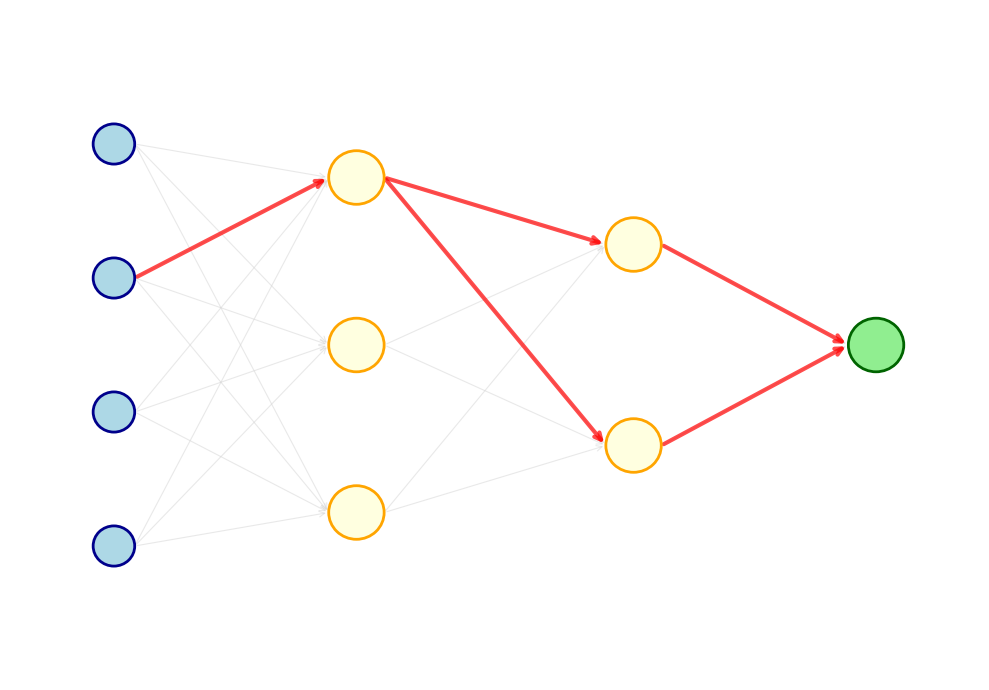

In [3]:
# Visualize a deeper network showing multiple paths from input to output
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.axis("off")

# Define positions for a 4-layer network (input, 2 hidden, output)
input_x = 1.5
hidden1_x = 5
hidden2_x = 9
output_x = 12.5

# Node positions
input_positions = [8, 6, 4, 2]  # 4 input nodes
hidden1_positions = [7.5, 5, 2.5]  # 3 nodes in first hidden layer
hidden2_positions = [6.5, 3.5]  # 2 nodes in second hidden layer
output_y = 5  # 1 output node

# Draw input layer
input_nodes = []
for y_pos in input_positions:
    circle = Circle((input_x, y_pos), 0.3, color="lightblue", ec="darkblue", linewidth=2, zorder=3)
    ax.add_patch(circle)
    input_nodes.append((input_x, y_pos))

# Draw first hidden layer
hidden1_nodes = []
for y_pos in hidden1_positions:
    circle = Circle(
        (hidden1_x, y_pos), 0.4, color="lightyellow", ec="orange", linewidth=2, zorder=3
    )
    ax.add_patch(circle)
    hidden1_nodes.append((hidden1_x, y_pos))

# Draw second hidden layer
hidden2_nodes = []
for y_pos in hidden2_positions:
    circle = Circle(
        (hidden2_x, y_pos), 0.4, color="lightyellow", ec="orange", linewidth=2, zorder=3
    )
    ax.add_patch(circle)
    hidden2_nodes.append((hidden2_x, y_pos))

# Draw output layer
output_node = Circle(
    (output_x, output_y), 0.4, color="lightgreen", ec="darkgreen", linewidth=2, zorder=3
)
ax.add_patch(output_node)

# Draw all connections from input to first hidden (in gray)
for inp in input_nodes:
    for h1 in hidden1_nodes:
        arrow = FancyArrowPatch(
            (inp[0] + 0.3, inp[1]),
            (h1[0] - 0.4, h1[1]),
            arrowstyle="->",
            mutation_scale=10,
            linewidth=0.8,
            color="lightgray",
            alpha=0.5,
            zorder=1,
        )
        ax.add_patch(arrow)

# Draw all connections from first hidden to second hidden (in gray)
for h1 in hidden1_nodes:
    for h2 in hidden2_nodes:
        arrow = FancyArrowPatch(
            (h1[0] + 0.4, h1[1]),
            (h2[0] - 0.4, h2[1]),
            arrowstyle="->",
            mutation_scale=10,
            linewidth=0.8,
            color="lightgray",
            alpha=0.5,
            zorder=1,
        )
        ax.add_patch(arrow)

# Draw all connections from second hidden to output (in gray)
for h2 in hidden2_nodes:
    arrow = FancyArrowPatch(
        (h2[0] + 0.4, h2[1]),
        (output_x - 0.4, output_y),
        arrowstyle="->",
        mutation_scale=10,
        linewidth=0.8,
        color="lightgray",
        alpha=0.5,
        zorder=1,
    )
    ax.add_patch(arrow)

# Highlight ONE specific path from a specific input weight to output
# Choose second input node (index 1)
highlighted_input = input_nodes[1]

# This input connects to ALL nodes in hidden layer 1
# Let's highlight paths through first and third hidden1 nodes
highlighted_h1_indices = [0, 2]  # First and third nodes

# These then connect to different nodes in hidden layer 2
# From h1[0] to both h2 nodes, and from h1[2] to both h2 nodes
highlighted_h2_indices = [0, 1]  # Both nodes in hidden2

# Highlight: Input -> Hidden1[0] -> Hidden2[0] -> Output (PATH 1)
arrow1 = FancyArrowPatch(
    (highlighted_input[0] + 0.3, highlighted_input[1]),
    (hidden1_nodes[0][0] - 0.4, hidden1_nodes[0][1]),
    arrowstyle="->",
    mutation_scale=12,
    linewidth=3,
    color="red",
    alpha=0.7,
    zorder=2,
)
ax.add_patch(arrow1)

arrow2 = FancyArrowPatch(
    (hidden1_nodes[0][0] + 0.4, hidden1_nodes[0][1]),
    (hidden2_nodes[0][0] - 0.4, hidden2_nodes[0][1]),
    arrowstyle="->",
    mutation_scale=12,
    linewidth=3,
    color="red",
    alpha=0.7,
    zorder=2,
)
ax.add_patch(arrow2)

arrow3 = FancyArrowPatch(
    (hidden2_nodes[0][0] + 0.4, hidden2_nodes[0][1]),
    (output_x - 0.4, output_y),
    arrowstyle="->",
    mutation_scale=12,
    linewidth=3,
    color="red",
    alpha=0.7,
    zorder=2,
)
ax.add_patch(arrow3)

# Highlight: Input -> Hidden1[0] -> Hidden2[1] -> Output (PATH 2)
arrow4 = FancyArrowPatch(
    (hidden1_nodes[0][0] + 0.4, hidden1_nodes[0][1]),
    (hidden2_nodes[1][0] - 0.4, hidden2_nodes[1][1]),
    arrowstyle="->",
    mutation_scale=12,
    linewidth=3,
    color="red",
    alpha=0.7,
    zorder=2,
)
ax.add_patch(arrow4)

arrow5 = FancyArrowPatch(
    (hidden2_nodes[1][0] + 0.4, hidden2_nodes[1][1]),
    (output_x - 0.4, output_y),
    arrowstyle="->",
    mutation_scale=12,
    linewidth=3,
    color="red",
    alpha=0.7,
    zorder=2,
)
ax.add_patch(arrow5)

plt.tight_layout()
plt.show()


Een mogelijk probleem bij _back propagation_ in diepe netwerken is dat bij het terug propageren van de _loss_, partiële afgeleiden steeds kleiner worden. Daardoor leren vroegere lagen trager dan latere lagen, wat tot leerproblemen leidt. Dit is het zogenaamde _vanishing gradients_ probleem. Er bestaan verschillende strategieën om dit tegen te gaan, zoals de keuze voor _ReLU_ als activatiefunctie en adaptieve _learning rates_ (zie bijvoorbeeld het [_Adam_ optimalisatiealgoritme](https://optimization.cbe.cornell.edu/index.php?title=Adam)).